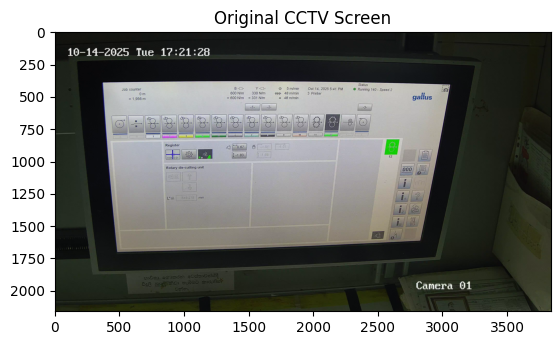

In [4]:
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt

# If running on Windows, set the path manually
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Load your test image
img_path = "../SampleImage.png"
img = Image.open(img_path)

# Show image
plt.imshow(img)
plt.axis('on')
plt.title("Original CCTV Screen")
plt.show()

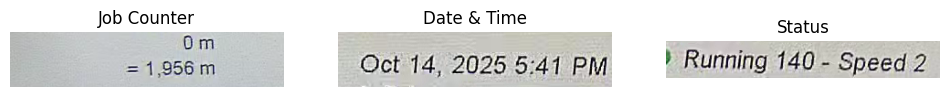

: 

In [ ]:
# Crop coordinates: (left, top, right, bottom)
# Adjust these numbers slightly if needed
job_counter_crop = img.crop((400,470,800,550))      # Job counter box
datetime_crop = img.crop((1930, 410, 2230, 470))       # Date & Time area
status_crop = img.crop((2320, 430, 2620, 470))        # Status area

# Display crops
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(job_counter_crop); axes[0].set_title("Job Counter")
axes[1].imshow(datetime_crop); axes[1].set_title("Date & Time")
axes[2].imshow(status_crop); axes[2].set_title("Status")
for ax in axes: ax.axis('off')
plt.show()



In [161]:
import re

# Tesseract config
custom_config = r'--oem 3 --psm 6'

# OCR
job_text = pytesseract.image_to_string(job_counter_crop, config=custom_config)
datetime_text = pytesseract.image_to_string(datetime_crop, config=custom_config)
status_text = pytesseract.image_to_string(status_crop, config=custom_config)

# Clean OCR text: strip spaces, fix 'O' -> '0', remove newlines
job_text = job_text.replace('\n', ' ').strip()           # remove line breaks
job_text = re.sub(r'^O(?=m)', '0', job_text)            # replace 'O' at start with '0'
job_text = re.sub(r'\s+=', ' =', job_text)              # fix spacing before '='

# Clean other fields
datetime_text = datetime_text.strip()
status_text = status_text.strip()

# Print corrected results
print("Job Counter OCR:", job_text)
print("Date & Time OCR:", datetime_text)
print("Status OCR:", status_text)


Job Counter OCR: 0m = 1,855 m
Date & Time OCR: Oct 14, 2025 3:34 PM
Status OCR: Ready 100
